<a href="https://colab.research.google.com/github/Kalpesh-Nandedkar/Email-Spam-Detection/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Email Spam Detection**

##### **Project Type**    - Classification
##### **By**    - Kalpesh B. Nandedkar

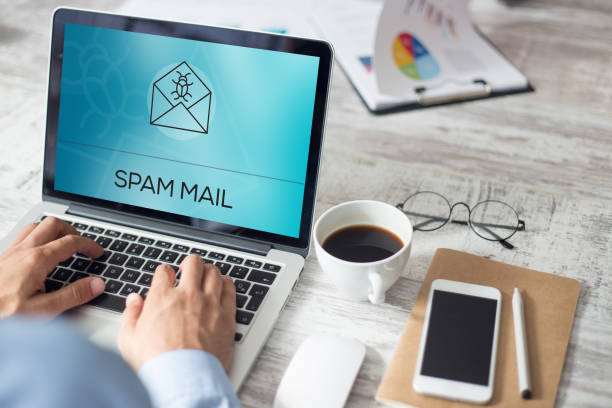

# **Project Summary -**

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
In recent years, internet has become an integral part of life. With increased use of internet, numbers of email users are increasing day by day. This increasing use of email has created problems caused by unsolicited bulk email messages commonly referred to as Spam. Email has now become one of the best ways for advertisements due to which spam emails are generated. Spam emails are the emails that the receiver does not wish to receive. a large number of identical messages are sent to several recipients of email. Spam usually arises as a result of giving out our email address on an unauthorized or unscrupulous website .There are many of the effects of Spam. Besides advertising, these may contain links to phishing or malware hosting websites found out to steal confidential information. to solve this problem the different spam filtering techniques are used. The spam filtering techniques are accustomed protect our mailbox for spam mails.

In this Project, we use python to build an email spam detector, then we use machine learning to train the spam detector to recognize and classify emails into spam and Ham.

Machine learning Model: This method involves using machine learning algorithms to analyze email data and identify patterns and characteristics of spam emails. The system then learns from this data and becomes more accurate over time.

In this project we used TfidfVectorizer, training and testing data, Feature Extraction, logistic regression, Decision Tree Classification, Gradient Boosting Classifier & Random Forest Classifier.

# **GitHub Link -**

https://github.com/Kalpesh-Nandedkar/Email-Spam-Detection

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [142]:
# Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from wordcloud import WordCloud, STOPWORDS

# To find the best parameters to improve our model
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

#  To implement machine learning models and statistical modelling
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


# To evaluate the model's parameter
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# To disable the display of all warning messages.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [55]:
# Load Dataset
df = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

### Dataset First View

In [56]:
# Dataset First Look
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dataset Rows & Columns count

In [57]:
# Dataset Rows & Columns count
df.shape

(5572, 5)

### Dataset Information

In [58]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Duplicate Values

In [59]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

403

#### Missing Values/Null Values

In [60]:
# Missing Values/Null Values Count
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

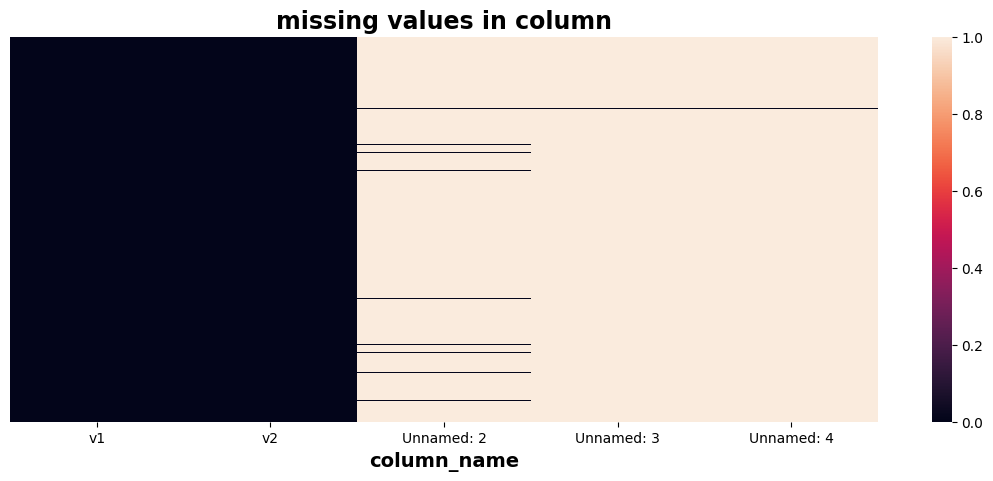

In [61]:
# Visualizing the missing values
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(),cbar = True, yticklabels = False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

## ***2. Understanding Your Variables***

In [62]:
# Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [63]:
# Dataset Describe
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Check Unique Values for each variable.

In [64]:
# Check Unique Values for each variable.
df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [65]:
# Write your code to make your dataset analysis ready.
# Dropping the Columns Unnamed : 2,3,4 as they are not useful in our analysis
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1,inplace = True)

In [75]:
# Removing duplicate Values from the dataset
df.drop_duplicates(inplace=True)

In [76]:
# Checking for duplicate values
len(df[df.duplicated()])

0

In [82]:
# Changing Column v1, v2 names to Target & Email
df.rename(columns = {'v1':'Target','v2':'Email'},inplace= True)

In [83]:
df.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### What all manipulations have you done and insights you found?

* We dropped the Columns Unnamed : 2,3,4 as they have very little data present in it in which there is also some duplicate value present in it.
* The rest of the data in the Columns Unnamed : 2,3,4 are NaN/Null. So, we dropped it.
* We remove duplicate values as it may cause some problem in our analysis. As, it may cause bias in the dataset.
*  We changed the column named v1 & v2 to Target & Email for better understanding.

## ***4. Data Vizualization & Experimenting with charts : Understand the relationships between variables***

##**Ham vs Spam percentage in dataset**

In [86]:
# Getting the count of value for spam & ham
df['Target'].value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

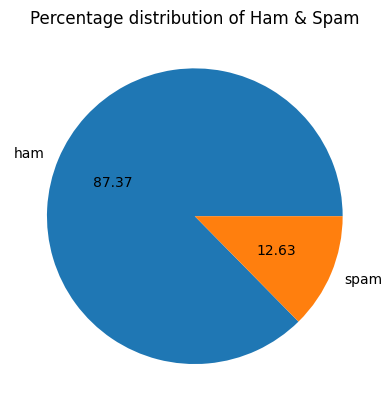

In [94]:
# Chart - 1 visualization code
# Visualizing pie diagram for ham& spam
plt.pie(df['Target'].value_counts(),autopct = "%.2f",labels = df['Target'].unique())
plt.title('Percentage distribution of Ham & Spam')
plt.show()

* The dataset has 87.37% of ham. While, 12.63% of Spam Emails.

##**Length of Each Email - Ham & Spam**

In [100]:
# Creating new dataframe for our visualization
email_length = df
# Creating length column store the length of each email
email_length['Length'] = email_length['Email'].apply(len)

In [99]:
email_length.head()

,Target,Email,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


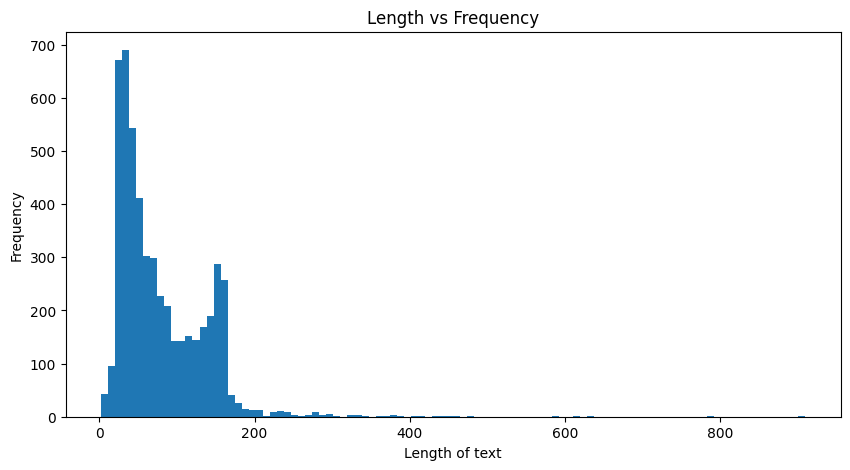

In [107]:
# Chart - 2 visualization code
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 5))
ax.hist(email_length['Length'], bins = 100)
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.title('Length vs Frequency')
plt.show()

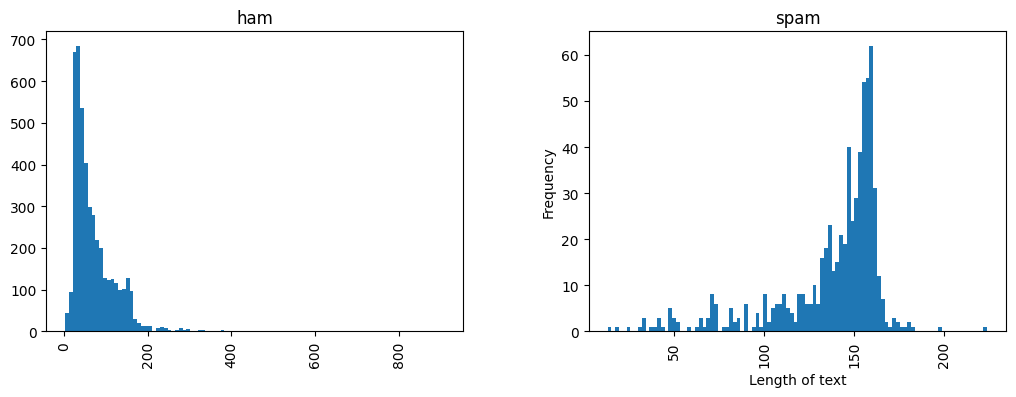

In [116]:
# Chart - 3 visualization code
# Creating histogram
email_length.hist(column='Length',by='Target', bins=100, figsize=(12,4))
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.show()

* Graphs and Statistic outcomes display that "Spam" messages generally hold more counted or lengthed words rather than "Ham", because, naturally, "Spam" keep advertising junk contents.


##**Wordcloud for Ham messages**

In [118]:
# creating a ham_msg separately
ham_msg = email_length[email_length['Target'] =='ham']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.Email.to_numpy().tolist())

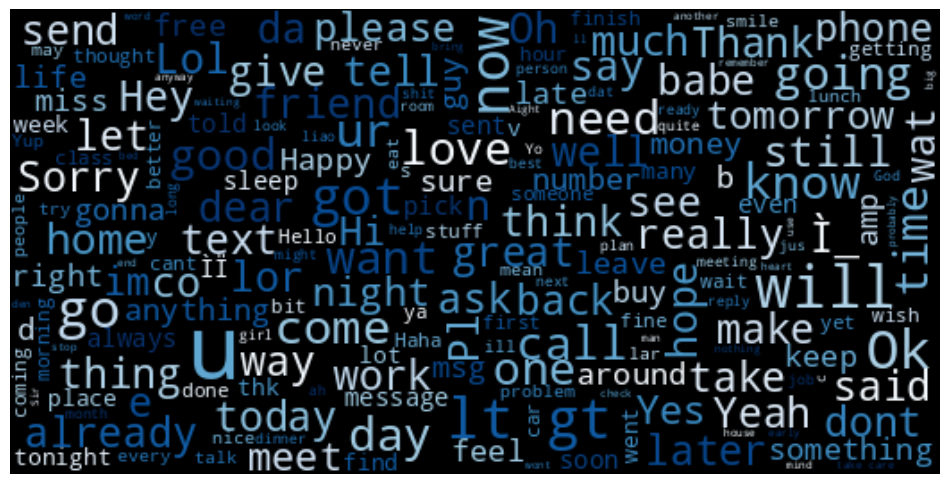

In [126]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS, max_font_size=50, background_color ="black",
                          colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(12,7))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # not display axis
plt.show()

##**Wordcloud for Spam messages**

In [127]:
# creating a spam_msg separately
spam_msg = email_length[email_length['Target'] =='spam']
# Create numpy list to visualize using wordcloud
spam_msg_text = " ".join(spam_msg.Email.to_numpy().tolist())

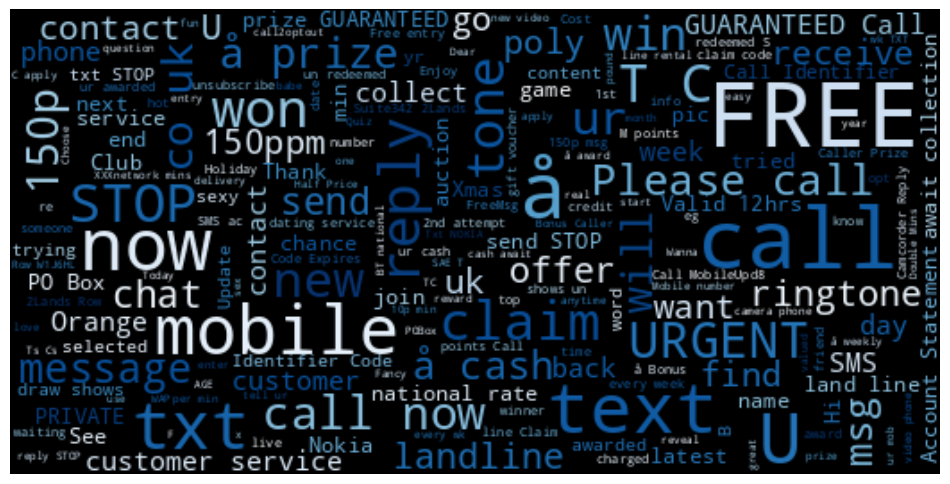

In [128]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black",
                           colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(12,7))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # not to display
plt.show()

## ***Feature Engineering & Data Pre-processing***

### Label Encoding

In [133]:
# label spam mail as 0;  ham mail as 1;

df.loc[df['Target'] == 'spam', 'Target',] = 0
df.loc[df['Target'] == 'ham', 'Target',] = 1

In [134]:
df.head()

,Target,Email,Length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


# DATA PREPROCESSING

In [136]:
# defining dependent and independent features
X = df['Email']   # independent variable
y = df['Target']  # dependent variable

# Data Splitting

In [137]:
# performing train test split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## Feature Extraction

In [140]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [143]:
#Learn vocabulary and idf, return document-term matrix.
xv_train = feature_extraction.fit_transform(X_train)
# Transform documents to document-term matrix.
xv_test = feature_extraction.transform(X_test)

In [147]:
#convert Y_train, Y_test values as integer

Y_train = y_train.astype('int')
Y_test = y_test.astype('int')

##**ML Model Implementation**


## **Model selection**
##1. Logistic Regression
##2. Decision Tree Classification
##3. Gradient Boosting Classifier
##4. Random Forest Classifier



# **ML Model - 1 - LOGISTIC REGRESSION**

In [148]:
# ML Model - 1 Implementation
# initializing LogisticRegression
# fitting the model
LR = LogisticRegression()
# fitting the model
LR.fit(xv_train, Y_train)
# Getting Prediction
pred_lr=LR.predict(xv_test)
print("The Accuracy of the Logistic Regression Model is {}".format(LR.score(xv_test,Y_test)))

The Accuracy of the Logistic Regression Model is 0.9642166344294004


In [150]:
# Classification Report
print(classification_report(Y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       145
           1       0.96      1.00      0.98       889

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034



# **ML Model - 2 - Decision Tree Classification**

In [151]:
# ML Model - 1 Implementation
# Implementing DecisionTreeClassifier
DT = DecisionTreeClassifier()
# fitting the model
DT.fit(xv_train, Y_train)
# Getting the Prediction
pred_dt = DT.predict(xv_test)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(DT.score(xv_test,Y_test)))

The Accuracy of the Decision Tree Classifier Model is 0.9632495164410058


In [153]:
# Classification Report
print(classification_report(Y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       145
           1       0.98      0.98      0.98       889

    accuracy                           0.96      1034
   macro avg       0.93      0.92      0.92      1034
weighted avg       0.96      0.96      0.96      1034



# **ML Model - 3 - Gradient Boosting Classifier**

In [154]:
# ML Model - 1 Implementation
# Implementing GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
# fitting the model
GBC.fit(xv_train, Y_train)
# Getting the Prediction
pred_gbc = GBC.predict(xv_test)
print("The Accuracy of the Gradient Boosting Classifier Model is {}".format(GBC.score(xv_test,Y_test)))

The Accuracy of the Gradient Boosting Classifier Model is 0.9593810444874274


In [155]:
# Classification Report
print(classification_report(Y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       145
           1       0.96      1.00      0.98       889

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



# **ML Model - 4 - Random Forest Classifier**

In [156]:
# ML Model - 1 Implementation
# Implementing RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
# fitting the model
RFC.fit(xv_train, Y_train)
# Getting the Prediction
pred_rfc = RFC.predict(xv_test)
print("The Accuracy of the Random Forest Classifier Model is {}".format(RFC.score(xv_test,Y_test)))

The Accuracy of the Random Forest Classifier Model is 0.9758220502901354


In [157]:
# Classification Report
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91       145
           1       0.97      1.00      0.99       889

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.97      1034



##**Model Testing**

In [161]:
# Creating a Function to Check whether a Email is Spam or Ham
def output_lable(n):
    if n == 0:
        return " Email is Spam"
    else:
        return "Email is Ham"

# Creating a Function for Manually Testing the Email
def manual_testing(text):
    testing_text = {"Email":[text]}
    new_def_test = pd.DataFrame(testing_text)
    new_x_test = new_def_test["Email"]
    new_xv_test = feature_extraction.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),output_lable(pred_RFC[0])))

##Testing whether a Email is Spam or Ham - 1

In [162]:
df['Email'][1]

'Ok lar... Joking wif u oni...'

In [163]:
Email = str(input())
manual_testing(Email)

Ok lar... Joking wif u oni...


LR Prediction: Email is Ham 
DT Prediction: Email is Ham 
GBC Prediction: Email is Ham 
RFC Prediction: Email is Ham


##Testing whether a Email is Spam or Ham - 2

In [169]:
df['Email'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [170]:
Email = str(input())
manual_testing(Email)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


LR Prediction:  Email is Spam 
DT Prediction:  Email is Spam 
GBC Prediction:  Email is Spam 
RFC Prediction:  Email is Spam


##Testing whether a Email is Spam or Ham - 3

In [171]:
df['Email'][15]

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'

In [172]:
Email = str(input())
manual_testing(Email)

XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL


LR Prediction:  Email is Spam 
DT Prediction:  Email is Spam 
GBC Prediction:  Email is Spam 
RFC Prediction:  Email is Spam
